<a href="https://colab.research.google.com/github/RazerRaymond/MachineLearningPS/blob/main/_concrete_compressive_strength_normalization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Introduction
1. Problem: Use the training data to generate models that predicts an unknown concrete's compressive strength given its features. Compare Performance w.r.t. normal and original data.

Data Set Used: 
UCI Concrete Compressive Strength Data Set
2. (a) **Uni-variate linear regression:**
There is two method: one used numpy matrix calculation to calculate the mse of predicted value and true values
The other is the regression/gradient descent algorithm. I used a batched GD, learning rate was highly tested. I tried values from 10 to 1e^-7, since the values are highly differed, in the running loop I chose the small one 0.00000001 which indeed lead to gradient descent and decreasing MSE. The regression will stop after 50000 runs since it would take too long otherwise.

    (b) **Multi-variate linear regression:**
there is two methods,
One calculate error similar to the univariate one,
the other is the regression/gradient descent algorithm. I used a batched GD, learning rate was 0.000001. The regression will stop after 100000 runs since it would take too long otherwise.

3. I normalized data by features and setting each features min value as 0, max value as 1. Normalize each column seperately. Please refer to the histogram before and after in each section for the detail of data visualization

### Result
Please refer to the plot in the coding area for result. Explained Variance and the corresponding histogram, including the normalized ones are printed out


***Please notice that for unregularized data, we have to use very small learning rate, and because I used the iteration stopping approach rather than epsilon one, it is hard to balance learning rate and the performance. I have to limit the iterations within 20k to avoid prolonged training time. If given proper time, learning rate, and initial values, the plot of regression line should look like trained with feature #5 (#4 in 0-7). ***

*Also the univariate regression is working perfectly for the normalized data, which also proves that the logistics is correct*


For all 8 features trained, 3 of them are performing better in training, and rest of them is better in testing w.r.t. Explained Variance as performance matrix. This could happen because we have a smaller test dataset, so variance is significantly lower(e.g. feature 8 in all 130 test data is 28)

By observations, Explained Variance is similar from train to test datasets. So if it performs well on training, it tends to perform well on testing (performance is correlated)

From my observation of the normalized data, many of the fields are drastically different, feature #5 for example, has w: 0.19369902139912834 in uni regression but only has 0.04538793 of weight in multi regression. Since many features are considered together, I think that coeffcients from univariate regression **failed** to predict the weights of the multivariate regression.

With the coefficient calculated, we suggest that feature #5 (column 4),Superplasticizer (component 5)(kg in a m^3 mixture), is the most predictive of a higher CCS since it has the biggest weight after training.

raw data w: 1.8162636916023913

normalized data w: 0.19369902139912834
all biggest

In comparison, the normalized data is faster to train, able to handle a bigger learning rate in GD, and has a higher Explained Variance.

## Regular Work

In [ ]:
# libraries needed
import pandas as pd
import numpy as np
import datetime
import csv
from sklearn.metrics import explained_variance_score
from sklearn import preprocessing
from scipy.stats import skewnorm 
!pip install xlrd==1.2.0

import pylab as plt

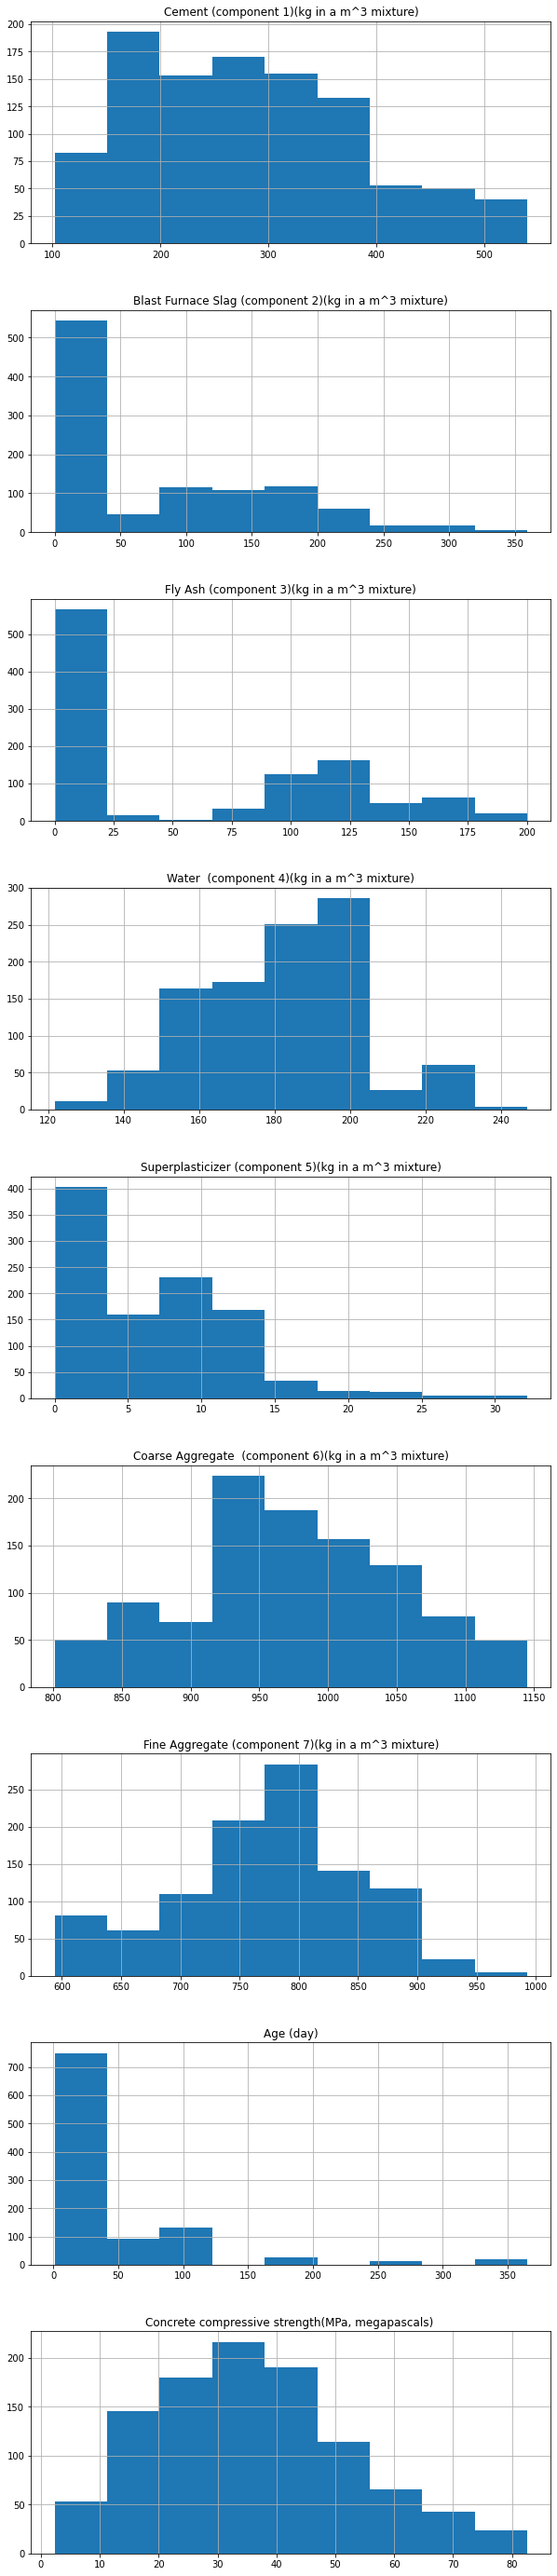

In [ ]:
# import datas
con_df = pd.read_excel('https://archive.ics.uci.edu/ml/machine-learning-databases/concrete/compressive/Concrete_Data.xls')
hist = con_df.hist(figsize = (10,50), layout = (9,1) , bins=9)

In [ ]:
# Train Test Split
train, test = con_df.head(900), con_df.tail(130)

y_train = train['Concrete compressive strength(MPa, megapascals) '].values
y_test = test['Concrete compressive strength(MPa, megapascals) '].values
train = train.drop('Concrete compressive strength(MPa, megapascals) ', axis=1)
test = test.drop('Concrete compressive strength(MPa, megapascals) ', axis=1)
x_train = train.values
x_test = test.values


# #data manipulations
# y_train = scaled_train['Concrete compressive strength(MPa, megapascals) '].values
# scaled_train_nl = scaled_train.drop('Concrete compressive strength(MPa, megapascals) ', axis=1)
# x_train = scaled_train_nl.values
# #test data dont need normalization
# y_test = test['Concrete compressive strength(MPa, megapascals) '].values
# test_nl = test.drop('Concrete compressive strength(MPa, megapascals) ', axis=1)
# x_test = test_nl.values

print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)


(900, 8)
(900,)
(130, 8)
(130,)


w: 0.02866478909015105 b: 29.924727870941044
Predicting using data from feature from column 0
Train:  
0.13616438744761927
Test:  
0.2226212816483314


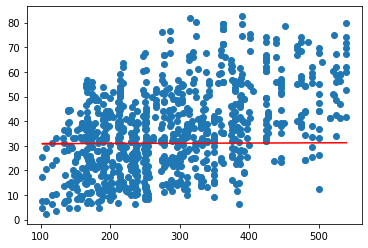


w: 0.18027329074001477 b: 7.492446980154553
Predicting using data from feature from column 1
Train:  
-0.5722011387892654
Test:  
-0.5350059670044911


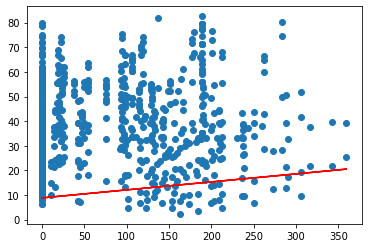


w: 0.2151290459337638 b: 8.058596189997907
Predicting using data from feature from column 2
Train:  
-0.6684652674279268
Test:  
-2.6502268474074673


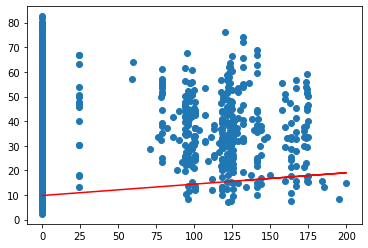


w: 0.1926232582302672 b: 0.44838933984813223
Predicting using data from feature from column 3
Train:  
-0.20308496924737596
Test:  
-0.15055820729469516


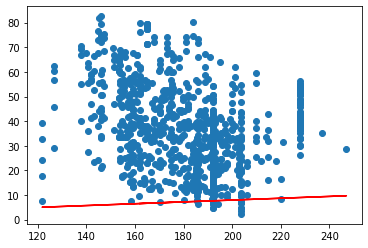


w: 1.8162636916023913 b: 0.30304881192170563
Predicting using data from feature from column 4
Train:  
0.11952752633187169
Test:  
-0.3777776683020142


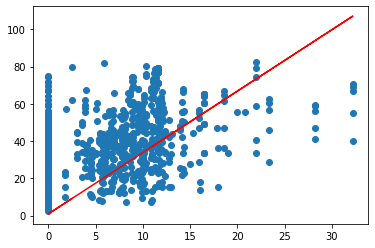


w: 0.006184591116233396 b: 30.011812769390954
Predicting using data from feature from column 5
Train:  
-0.011379011295092
Test:  
-0.016956535950794382


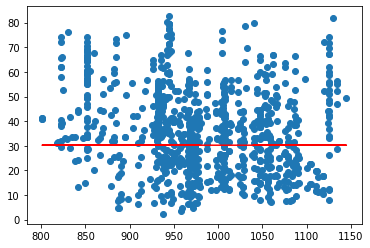


w: 0.0076906236710924565 b: 30.01557711615487
Predicting using data from feature from column 6
Train:  
-0.014392022675895566
Test:  
-0.014101638692326723


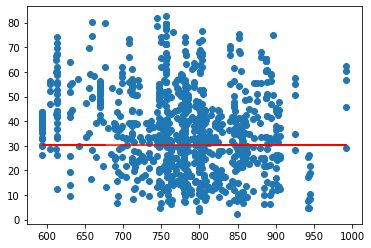


w: 0.2602006362184063 b: 7.484413929267211
Predicting using data from feature from column 7
Train:  
-0.3540846443833676
Test:  
2.220446049250313e-16


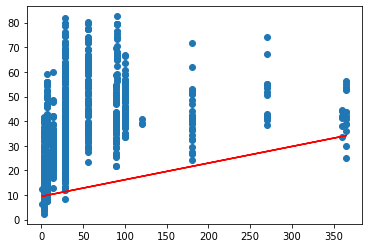

In [ ]:
# Uni-variate linear regression
# Some logistics credit to towardsDataScience

# Error Calculation
def mseCalc(tuple, x, y):
  w, b = tuple
  return np.sum((np.dot(x,w) - y)**2)/len(y)

def regression(X, Y, learning_rate, iter, w = 0, b = 0): 
  lr = learning_rate
  # tuple=(m,b)
  # print(mseCalc(tuple, X, Y))
  # prev_error = 0
  # Performing Gradient Descent 
  for i in range(iter): 
    Y_pred = np.multiply(X,w) + b
    # print(Y_pred.shape)
    # error = mse(m,c,X,Y)
    # print(abs(prev_error-error))
    # if abs(prev_error-error) <= epsilon:
    #     return (m, c)
    # prev_error = error
    w_slash = (-2.0/len(X)) * sum(X * (Y - Y_pred))  
    b_slash = (-2.0/len(X)) * sum(Y - Y_pred)  
    w -= (lr * w_slash)  
    b -= (lr * b_slash)  
    # tuple=(m,b)
    # print(mseCalc(tuple, X, Y))
  return (w, b)


for i in range(len(x_train[0])):
  if i == 4:
    lr = 0.0000005
    itc = 10000
    w, b = regression(X=x_train[:,i], Y=y_train, learning_rate = lr, iter = itc)
  elif i == 5 or i == 6 or i == 0:
    lr = 0.000001
    itc = 20000
    w, b = regression(X=x_train[:,i], Y=y_train, learning_rate = lr, iter = itc, w = 0.01, b = 30)
  else:
    lr = 0.00001
    itc = 20000
    w, b = regression(X=x_train[:,i], Y=y_train, learning_rate = lr, iter = itc)
  print("w: " + str(w) + " b: " + str(b))
  print("Predicting using data from feature from column " + str(i))
  y_pred = np.dot(x_train[:,i],w) + b
  print("Train:  ")
  print(explained_variance_score(y_train,y_pred))
  print("Test:  ")
  y_pred_test = np.dot(x_test[:,i],w) + b
  print(explained_variance_score(y_test,y_pred_test))
  #Scatter plot
  plt.figure()
  plt.scatter(x_train[:,i], y_train)
  abline_values = [w * i + b for i in y_pred]
  plt.plot(x_train[:,i], abline_values, 'r')
  plt.show()
  print()

In [ ]:
# #modified data frames to do vector calculation
# train['1'] = 1.0
# test['1'] = 1.0
# mod_train = train[['1','Cement (component 1)(kg in a m^3 mixture)',
#  'Blast Furnace Slag (component 2)(kg in a m^3 mixture)',
#  'Fly Ash (component 3)(kg in a m^3 mixture)',
#  'Water  (component 4)(kg in a m^3 mixture)',
#  'Superplasticizer (component 5)(kg in a m^3 mixture)',
#  'Coarse Aggregate  (component 6)(kg in a m^3 mixture)',
#  'Fine Aggregate (component 7)(kg in a m^3 mixture)',
#  'Age (day)']]
# mod_test = test[['1','Cement (component 1)(kg in a m^3 mixture)',
#  'Blast Furnace Slag (component 2)(kg in a m^3 mixture)',
#  'Fly Ash (component 3)(kg in a m^3 mixture)',
#  'Water  (component 4)(kg in a m^3 mixture)',
#  'Superplasticizer (component 5)(kg in a m^3 mixture)',
#  'Coarse Aggregate  (component 6)(kg in a m^3 mixture)',
#  'Fine Aggregate (component 7)(kg in a m^3 mixture)',
#  'Age (day)']]

# # normalize the data
# scaler = preprocessing.MinMaxScaler()
# names = mod_train.columns
# d = scaler.fit_transform(mod_train)
# scaled_train_m = pd.DataFrame(d, columns=names)
# x_train_ms = scaled_train_m.values
# x_test_m = mod_test.values

In [ ]:
# Multi-variate linear regression
# Accredit : https://faun.pub/implementing-multiple-linear-regression-from-scratch-in-python-f5d84d4935bb
def costCalc(x,y,w,b):
    cost = np.sum(((((np.dot(x,w) + b) - y) ** 2) /len(y))/2)
    return cost

def multi_regression(X, Y, learning_rate, iter): 
    w = np.zeros(X.shape[1])
    b = 0
    for i in range(iter):
        Y_pred = X.dot(w) + b
        
        w_slash = X.T.dot(Y_pred - Y) / len(Y)
        b_slash = np.sum(Y_pred - Y) / len(Y)
        
        w -= learning_rate*w_slash
        b -= learning_rate*b_slash
  
        cost = costCalc(X, Y, w, b)
        # print(cost)
        
    return w, b
w, b = multi_regression(X=x_test,Y=y_test,learning_rate = 0.0000005, iter = 200000)
print("w: " + str(w) + " b: " + str(b))
y_pred = np.dot(x_train,w) + b
print("Train:  ")
print(explained_variance_score(y_train,y_pred))
print("Test:  ")
y_pred_test = np.dot(x_test,w) + b
print(explained_variance_score(y_test,y_pred_test))

w: [ 0.14546879  0.10422084  0.02948917 -0.07406526 -0.03792732 -0.00583066
  0.00774786 -0.00038539] b: -1.3764051418257802e-05
Train:  
0.28164074468251676
Test:  
0.8476107897889019


## Extra Credit Normalization

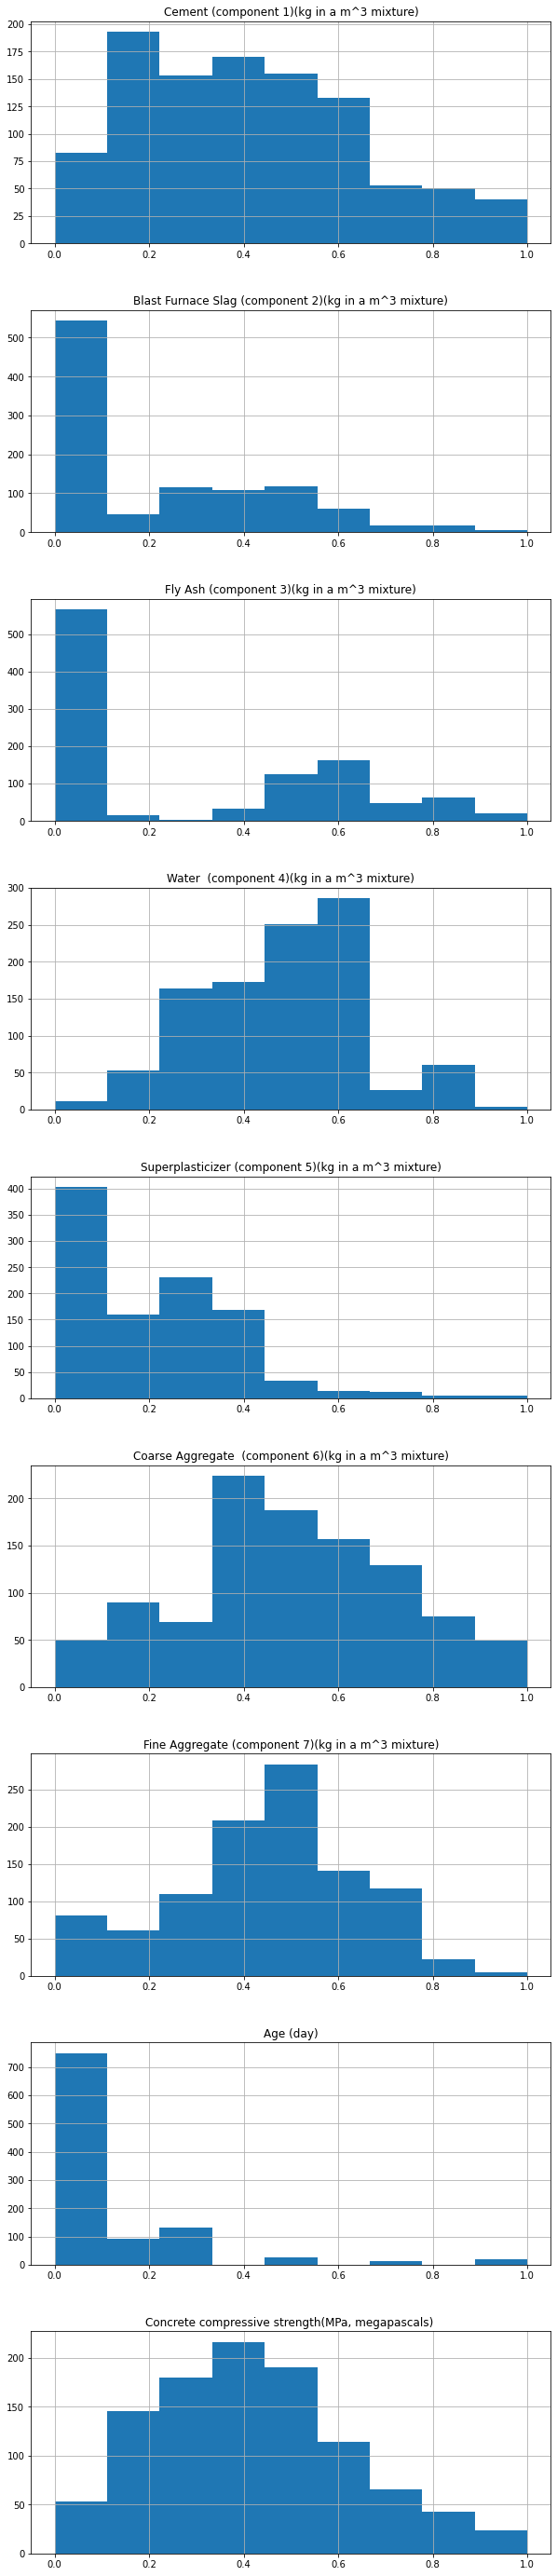

In [ ]:
#Normalize data
scaler = preprocessing.MinMaxScaler()
2
d = scaler.fit_transform(con_df)
scaled_df = pd.DataFrame(d, columns=names)
hist = scaled_df.hist(figsize = (10,50), layout = (9,1) , bins=9)

# Train Test Split
train, test = scaled_df.head(900), scaled_df.tail(130)

y_train = train['Concrete compressive strength(MPa, megapascals) '].values
y_test = test['Concrete compressive strength(MPa, megapascals) '].values
train = train.drop('Concrete compressive strength(MPa, megapascals) ', axis=1)
test = test.drop('Concrete compressive strength(MPa, megapascals) ', axis=1)
x_train = train.values
x_test = test.values


w: 0.2636650683511092 b: 0.31416915363861375
Predicting using data from feature from column 0
Train:  
0.1944156270751065
Test:  
0.3364110119098719


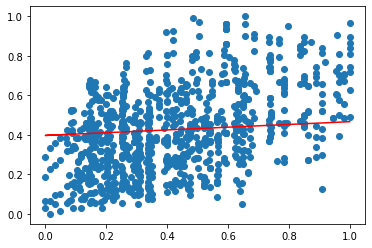


w: 0.09735987595474523 b: 0.405775682926384
Predicting using data from feature from column 1
Train:  
0.0166910267367818
Test:  
0.08886573778772477


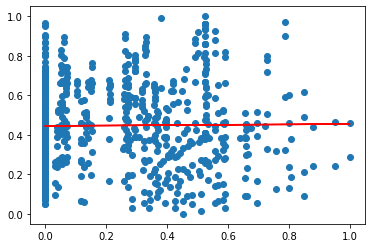


w: 0.02482293236407058 b: 0.41667232681667515
Predicting using data from feature from column 2
Train:  
-0.0045138752073847765
Test:  
-0.059209273789971206


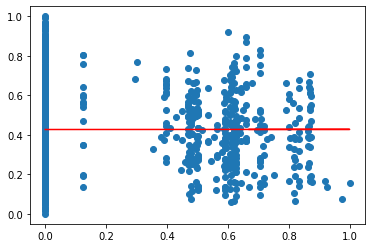


w: 0.04920258491127217 b: 0.39604771560315005
Predicting using data from feature from column 3
Train:  
-0.02512188127455328
Test:  
-0.014206520562602964


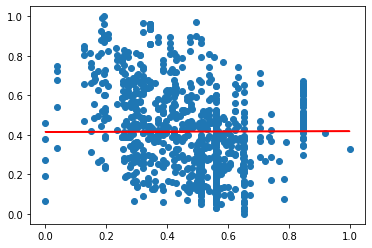


w: 0.19369902139912834 b: 0.39097485003418564
Predicting using data from feature from column 4
Train:  
0.11460819024556557
Test:  
-0.05381482593163889


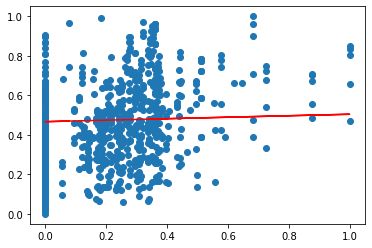


w: 0.0614033301842142 b: 0.38682192041904023
Predicting using data from feature from column 5
Train:  
-0.028606736580315095
Test:  
-0.04316970507272688


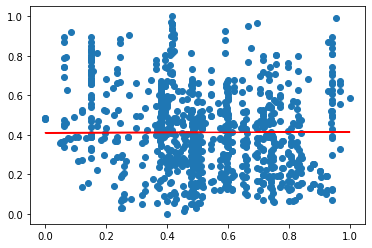


w: 0.060927663379422924 b: 0.3922162478605133
Predicting using data from feature from column 6
Train:  
-0.02421645521832838
Test:  
-0.02433059138591509


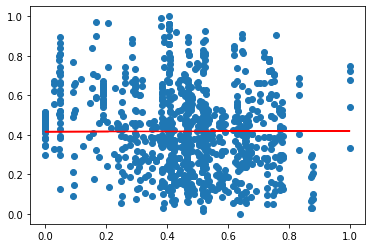


w: 0.15040582775518951 b: 0.40565882026445993
Predicting using data from feature from column 7
Train:  
0.06967017993620306
Test:  
-2.220446049250313e-16


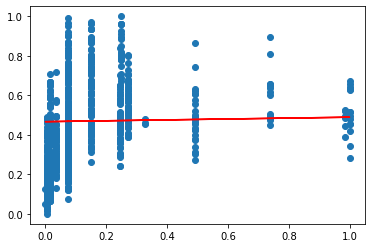

In [ ]:
# Uni-variate linear regression

# Error Calculation
def mseCalc(tuple, x, y):
  w, b = tuple
  return np.sum((np.dot(x,w) - y)**2)/len(y)

def regression(X, Y, learning_rate, iter, w = 0, b = 0): 
  lr = learning_rate
  for i in range(iter): 
    Y_pred = np.multiply(X,w) + b
    w_slash = (-2.0/len(X)) * sum(X * (Y - Y_pred))  
    b_slash = (-2.0/len(X)) * sum(Y - Y_pred)  
    w -= (lr * w_slash)  
    b -= (lr * b_slash)  
    # tuple=(m,b)
    # print(mseCalc(tuple, X, Y))
  return (w, b)


for i in range(len(x_train[0])):
  w, b = regression(X=x_train[:,i], Y=y_train, learning_rate = 0.001, iter = 5000)
  print("w: " + str(w) + " b: " + str(b))
  print("Predicting using data from feature from column " + str(i))
  y_pred = np.dot(x_train[:,i],w) + b
  print("Train:  ")
  print(explained_variance_score(y_train,y_pred))
  print("Test:  ")
  y_pred_test = np.dot(x_test[:,i],w) + b
  print(explained_variance_score(y_test,y_pred_test))
  #Scatter plot
  plt.figure()
  plt.scatter(x_train[:,i], y_train)
  abline_values = [w * i + b for i in y_pred]
  plt.plot(x_train[:,i], abline_values, 'r')
  plt.show()
  print()

In [ ]:
def costCalc(x,y,w,b):
    cost = np.sum(((((np.dot(x,w) + b) - y) ** 2) /len(y))/2)
    return cost

def multi_regression(X, Y, learning_rate, iter): 
    w = np.zeros(X.shape[1])
    b = 0
    for i in range(iter):
        Y_pred = X.dot(w) + b
        
        w_slash = X.T.dot(Y_pred - Y) / len(Y)
        b_slash = np.sum(Y_pred - Y) / len(Y)
        
        w -= learning_rate*w_slash
        b -= learning_rate*b_slash
  
        cost = costCalc(X, Y, w, b)
        # print(cost)
        
    return w, b
w, b = multi_regression(X=x_test,Y=y_test,learning_rate = 0.001, iter = 10000)
print("w: " + str(w) + " b: " + str(b))
y_pred = np.dot(x_train,w) + b
print("Train:  ")
print(explained_variance_score(y_train,y_pred))
print("Test:  ")
y_pred_test = np.dot(x_test,w) + b
print(explained_variance_score(y_test,y_pred_test))

w: [ 0.20933779  0.15543498 -0.07328496  0.08387106  0.04538793  0.0143507
  0.05126022  0.01589322] b: 0.21426410233443766
Train:  
0.15673426972721527
Test:  
0.4710453252392153
